In [ ]:
from google.colab import files
files.upload()
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16


In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(32,32,3)
)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14,846,273
Trainable params: 131,585
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,

        )

Epoch 1/10
625/625 [==============================] - 88s 138ms/step - loss: 0.5798 - accuracy: 0.6892 - val_loss: 0.5491 - val_accuracy: 0.7168
Epoch 2/10
625/625 [==============================] - 79s 127ms/step - loss: 0.5494 - accuracy: 0.7159 - val_loss: 0.5290 - val_accuracy: 0.7338
Epoch 3/10
625/625 [==============================] - 79s 127ms/step - loss: 0.5417 - accuracy: 0.7199 - val_loss: 0.5272 - val_accuracy: 0.7296
Epoch 4/10
625/625 [==============================] - 80s 129ms/step - loss: 0.5315 - accuracy: 0.7326 - val_loss: 0.5272 - val_accuracy: 0.7344
Epoch 5/10
625/625 [==============================] - 80s 128ms/step - loss: 0.5235 - accuracy: 0.7361 - val_loss: 0.5174 - val_accuracy: 0.7422
Epoch 6/10
625/625 [==============================] - 79s 127ms/step - loss: 0.5175 - accuracy: 0.7401 - val_loss: 0.5213 - val_accuracy: 0.7382
Epoch 7/10
625/625 [==============================] - 80s 127ms/step - loss: 0.5153 - accuracy: 0.7416 - val_loss: 0.5159 - val_ac

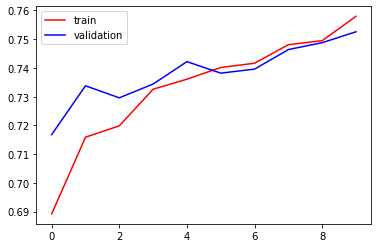

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

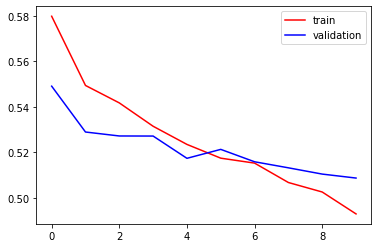

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Fine Tunning

In [ ]:
# set the block5_conv layer of VGG16 trainable
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(32,32)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(32,32)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5), # RMSPROP with very low learning rate is best experiently proven
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 29s 45ms/step - loss: 0.5525 - accuracy: 0.7159 - val_loss: 0.4915 - val_accuracy: 0.7610
Epoch 2/10
625/625 [==============================] - 26s 41ms/step - loss: 0.4814 - accuracy: 0.7669 - val_loss: 0.4655 - val_accuracy: 0.7728
Epoch 3/10
625/625 [==============================] - 26s 41ms/step - loss: 0.4499 - accuracy: 0.7883 - val_loss: 0.4658 - val_accuracy: 0.7752
Epoch 4/10
625/625 [==============================] - 27s 43ms/step - loss: 0.4248 - accuracy: 0.8032 - val_loss: 0.4539 - val_accuracy: 0.7896
Epoch 5/10
625/625 [==============================] - 25s 41ms/step - loss: 0.4021 - accuracy: 0.8171 - val_loss: 0.4433 - val_accuracy: 0.7924
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 0.3809 - accuracy: 0.8314 - val_loss: 0.4554 - val_accuracy: 0.7898
Epoch 7/10
625/625 [==============================] - 26s 41ms/step - loss: 0.3591 - accuracy: 0.8425 - val_loss: 0.4769 - val_accuracy:

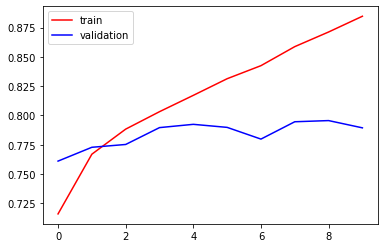

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

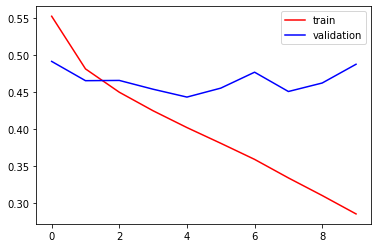

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()